In [10]:
import numpy as np

import noisyreach.plotter_matplotlib as nplot
from noisyreach.linear_sim import LinearSim

v = 6.5
L = 0.3302
A = np.array([[0, v], [0, 0]])
B = np.array([[0], [v / L]])

x0 = np.array([1.0, 0.0])
period = 0.02
time_horizon = 2
time_step = 0.01

sim = LinearSim("F1", A, B, period=period)
# sim.update_controller("manual", K=np.array([[0.2935, 0.05]]))
t_nom = sim.simulate(x0, time_horizon, time_step)
sim.sensing_error_std = np.array([0.5, 0.5])
t_1 = sim.simulate(x0, time_horizon, time_step)
t_1

array([[ 0.     ,  1.     ,  0.     ],
       [ 0.01   ,  1.     ,  0.     ],
       [ 0.02   ,  1.     ,  0.     ],
       [ 0.03   ,  0.99697, -0.09309],
       [ 0.04   ,  0.9879 , -0.18619],
       [ 0.05   ,  0.97598, -0.1805 ],
       [ 0.06   ,  0.96443, -0.17481],
       [ 0.07   ,  0.94598, -0.39307],
       [ 0.08   ,  0.91333, -0.61134],
       [ 0.09   ,  0.87275, -0.63739],
       [ 0.1    ,  0.83047, -0.66344],
       [ 0.11   ,  0.78905, -0.61098],
       [ 0.12   ,  0.75105, -0.55851],
       [ 0.13   ,  0.7131 , -0.60908],
       [ 0.14   ,  0.67187, -0.65966],
       [ 0.15   ,  0.62836, -0.67894],
       [ 0.16   ,  0.5836 , -0.69823],
       [ 0.17   ,  0.53776, -0.71247],
       [ 0.18   ,  0.49098, -0.72671],
       [ 0.19   ,  0.44761, -0.60784],
       [ 0.2    ,  0.41196, -0.48897],
       [ 0.21   ,  0.38131, -0.4542 ],
       [ 0.22   ,  0.35292, -0.41943],
       [ 0.23   ,  0.32916, -0.31142],
       [ 0.24   ,  0.31243, -0.20341],
       [ 0.25   ,  0.2991

In [18]:
# Create 3D plot similar to the safety visualization using plotly for better 3D rendering
import noisyreach.plotter_plotly as pplot

SAFE_RADIUS = 0.4

# Create 3D plot with plotly for better safety tube visualization
fig_3d = pplot.new_plot(plot3d=True)

# Plot the safety tube around nominal trajectory
pplot.plot_safetube(
    fig_3d, t_nom, SAFE_RADIUS, name="nominal", t_dim=0, x_dim=1, y_dim=2
)

# Plot the perturbed trajectory
dev = np.linalg.norm((t_nom - t_1)[:, 1:], axis=1)
max_deviation = np.max(dev)

if max_deviation < SAFE_RADIUS:
    pplot.plot_trace(
        fig_3d, t_1, color="green", name="Random", t_dim=0, x_dim=1, y_dim=2, alpha=0.8
    )
else:
    pplot.plot_trace(
        fig_3d, t_1, color="red", name="Violation", t_dim=0, x_dim=1, y_dim=2, alpha=0.8
    )

# Update the layout with smaller axis label fonts
fig_3d.update_layout(
    scene=dict(
        xaxis=dict(title=dict(text="x₁", font=dict(size=12)), tickfont=dict(size=10)),
        yaxis=dict(title=dict(text="x₂", font=dict(size=12)), tickfont=dict(size=10)),
        zaxis=dict(title=dict(text="t", font=dict(size=12)), tickfont=dict(size=10)),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2)),
    ),
    showlegend=True,
    font=dict(size=10),  # Overall font size
)

pplot.display_fig(fig_3d)

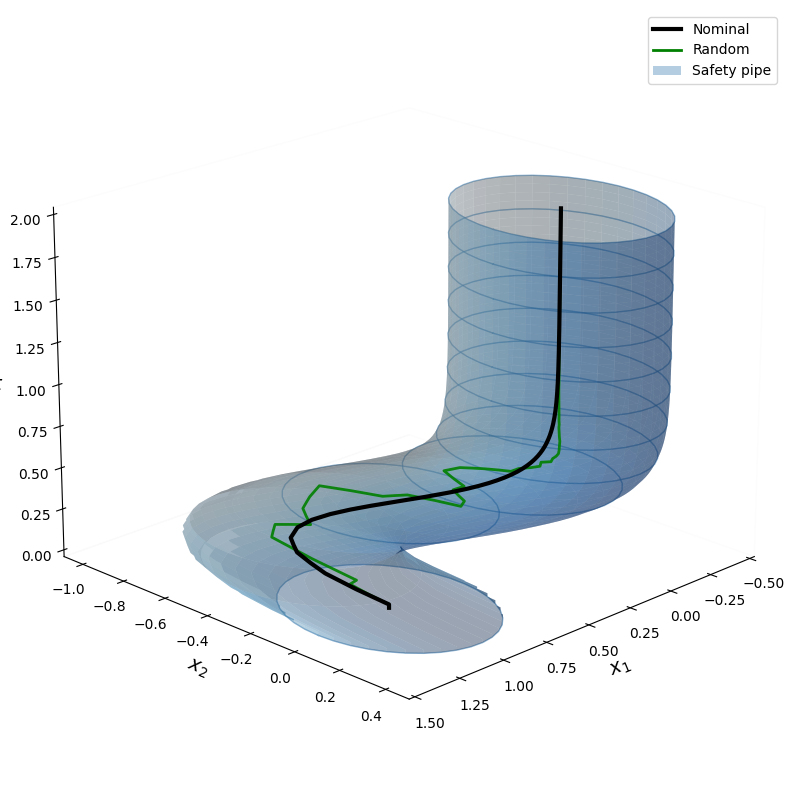

In [ ]:
# Create 3D plot using matplotlib with enhanced cylindrical safety tube
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

SAFE_RADIUS = 0.4

# Create 3D plot with matplotlib for better axis label rendering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Extract coordinates
t_vals = t_nom[:, 0]
x1_vals = t_nom[:, 1]
x2_vals = t_nom[:, 2]

# Create proper cylindrical safety tube using surface plot
n_theta = 40  # More angular divisions for smoother surface
n_time = len(t_vals)  # Use all time points for smooth tube

# Create meshgrid for cylindrical coordinates
theta = np.linspace(0, 2 * np.pi, n_theta)
T, THETA = np.meshgrid(t_vals, theta)

# Calculate tube surface coordinates
X1_tube = np.zeros_like(T)
X2_tube = np.zeros_like(T)

for i, t_val in enumerate(t_vals):
    # Find nominal position at this time
    x1_nom = x1_vals[i]
    x2_nom = x2_vals[i]

    # Create circle around nominal trajectory
    X1_tube[:, i] = x1_nom + SAFE_RADIUS * np.cos(theta)
    X2_tube[:, i] = x2_nom + SAFE_RADIUS * np.sin(theta)

# Create color mapping based on angle for 3D effect
# This creates highlights and shadows around the cylinder
colors = np.sin(THETA) * 0.5 + 0.5  # Normalize to 0-1 range

# Create custom colormap - more blue with better 3D shading
colors_blue = cm.Blues(colors * 0.7 + 0.3)  # Use blues colormap with range 0.3-1.0

# Plot safety tube as surface with enhanced 3D coloring
surf = ax.plot_surface(
    X1_tube,
    X2_tube,
    T,
    facecolors=colors_blue,
    alpha=0.4,
    linewidth=0,
    antialiased=True,
    shade=True,
)

# Alternative: Try wireframe for clearer structure
# ax.plot_wireframe(X1_tube, X2_tube, T, alpha=0.3, color='steelblue', linewidth=0.5)

# Add contour lines at regular intervals for better depth perception
for i in range(0, len(t_vals), 20):
    circle_x1 = x1_vals[i] + SAFE_RADIUS * np.cos(theta)
    circle_x2 = x2_vals[i] + SAFE_RADIUS * np.sin(theta)
    circle_t = np.full_like(theta, t_vals[i])
    ax.plot(circle_x1, circle_x2, circle_t, "steelblue", alpha=0.6, linewidth=1)

# Plot nominal trajectory as black line
ax.plot(x1_vals, x2_vals, t_vals, "k-", linewidth=3, label="Nominal", zorder=10)

# Plot perturbed trajectory
t1_vals = t_1[:, 0]
x1_t1_vals = t_1[:, 1]
x2_t1_vals = t_1[:, 2]

dev = np.linalg.norm((t_nom - t_1)[:, 1:], axis=1)
max_deviation = np.max(dev)

if max_deviation < SAFE_RADIUS:
    ax.plot(
        x1_t1_vals,
        x2_t1_vals,
        t1_vals,
        "g-",
        linewidth=2,
        alpha=0.9,
        label="Random",
        zorder=9,
    )
else:
    ax.plot(
        x1_t1_vals,
        x2_t1_vals,
        t1_vals,
        "r-",
        linewidth=2,
        alpha=0.9,
        label="Violation",
        zorder=9,
    )

# Set axis labels with proper LaTeX formatting
ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.set_zlabel(r"$t$", fontsize=14)

# Set viewing angle for better 3D perspective
ax.view_init(elev=20, azim=45)

# Add legend (need to handle surface plot legend manually)
legend_elements = [
    plt.Line2D([0], [0], color="black", linewidth=3, label="Nominal"),
    plt.Line2D([0], [0], color="green", linewidth=2, label="Random"),
    Patch(facecolor="steelblue", alpha=0.4, label="Safety pipe"),
]
ax.legend(handles=legend_elements, loc="upper right")

# Clean up the plot - remove grid for cleaner 3D appearance
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make pane edges very light
ax.xaxis.pane.set_edgecolor("lightgray")
ax.yaxis.pane.set_edgecolor("lightgray")
ax.zaxis.pane.set_edgecolor("lightgray")
ax.xaxis.pane.set_alpha(0.05)
ax.yaxis.pane.set_alpha(0.05)
ax.zaxis.pane.set_alpha(0.05)

# Set background to white for better contrast
ax.xaxis.pane.set_facecolor("white")
ax.yaxis.pane.set_facecolor("white")
ax.zaxis.pane.set_facecolor("white")

plt.tight_layout()
plt.show()

In [2]:
sim.sensing_error_std = np.array([0.3, 0.0])
tes = []
for p in [0.02, 0.03, 0.04, 0.06]:
    sim.update_period(p)
    tes += [sim.simulate(x0, time_horizon, time_step) for _ in range(2)]
tes[0]

array([[ 0.     ,  1.     ,  0.     ],
       [ 0.01   ,  1.     ,  0.     ],
       [ 0.02   ,  1.     ,  0.     ],
       [ 0.03   ,  0.99932, -0.0208 ],
       [ 0.04   ,  0.9973 , -0.04161],
       [ 0.05   ,  0.99276, -0.09794],
       [ 0.06   ,  0.98456, -0.15427],
       [ 0.07   ,  0.97218, -0.22667],
       [ 0.08   ,  0.9551 , -0.29907],
       [ 0.09   ,  0.93301, -0.38044],
       [ 0.1    ,  0.90564, -0.46181],
       [ 0.11   ,  0.87437, -0.50039],
       [ 0.12   ,  0.84059, -0.53896],
       [ 0.13   ,  0.8043 , -0.57759],
       [ 0.14   ,  0.7655 , -0.61621],
       [ 0.15   ,  0.72374, -0.66868],
       [ 0.16   ,  0.67857, -0.72115],
       [ 0.17   ,  0.63035, -0.76267],
       [ 0.18   ,  0.57943, -0.80418],
       [ 0.19   ,  0.52671, -0.81781],
       [ 0.2    ,  0.47311, -0.83144],
       [ 0.21   ,  0.41861, -0.84542],
       [ 0.22   ,  0.36321, -0.85939],
       [ 0.23   ,  0.30715, -0.86541],
       [ 0.24   ,  0.2507 , -0.87143],
       [ 0.25   ,  0.1939

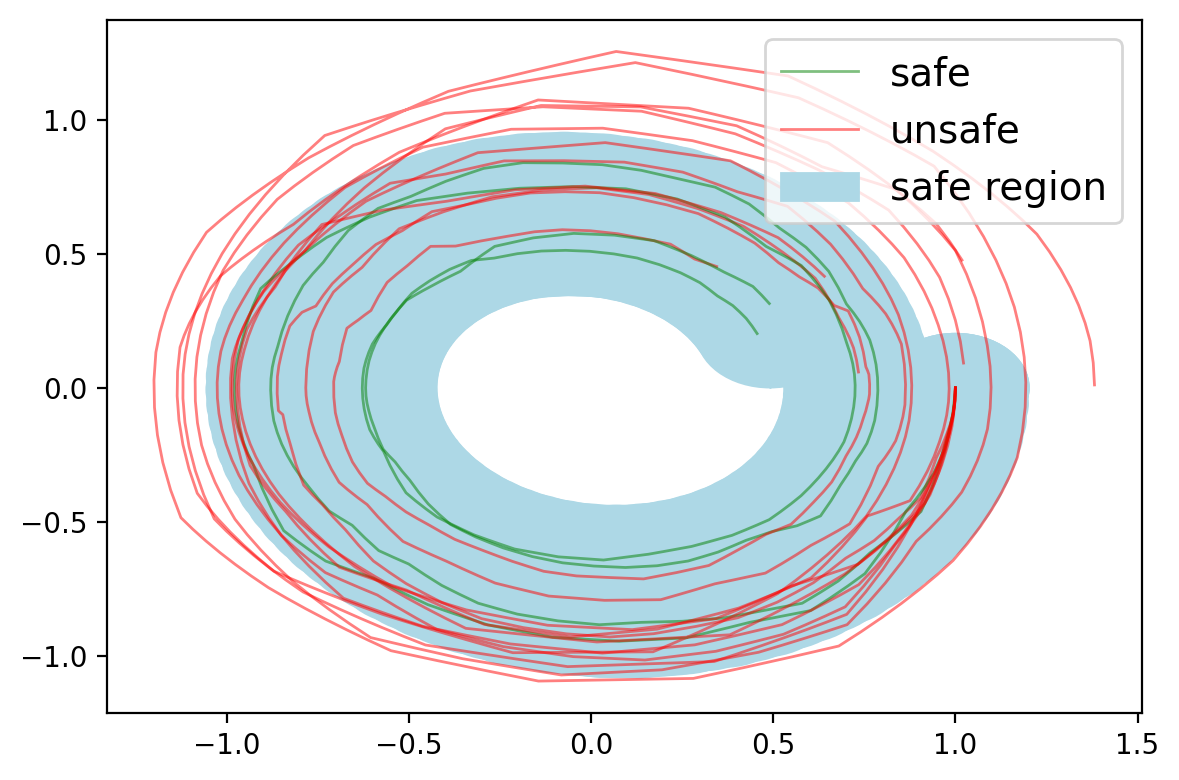

In [ ]:
SAFE_MARGIN = 0.2

fig = nplot.new_plot(plot3d=False)
for te in tes:
    dev = np.linalg.norm((t_nom - te)[:, 1:], axis=1)
    if max(dev) < SAFE_MARGIN:
        nplot.plot_trace(
            fig, te, color="green", x_dim=1, y_dim=2, name="safe", alpha=0.5
        )
    else:
        nplot.plot_trace(
            fig, te, color="red", x_dim=1, y_dim=2, name="unsafe", alpha=0.5
        )
nplot.plot_safetube(fig, t_nom, SAFE_MARGIN, x_dim=1, y_dim=2)

# fig.show(renderer="browser")
nplot.show(fig)

18


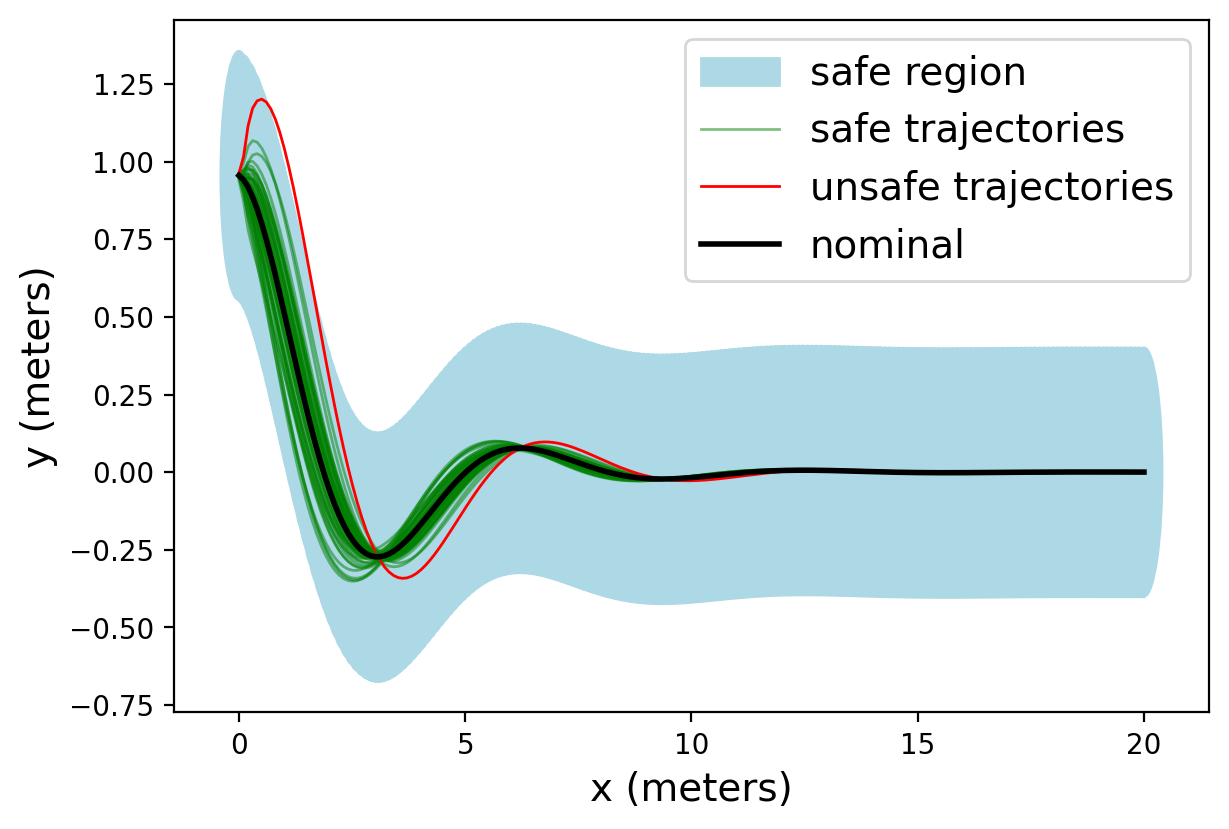

In [ ]:
r = 0.4
a, b, c = -0.4, 1.0, -0.3

t_nom = np.linspace(0, 20, 200)
# y is the position of a damped oscillator
ynom = np.exp(a * t_nom) * b * (np.cos(t_nom + c))
# Generate 50 random a, b, and c values around the nominal values and generate corresponding y values

s = 17
while True:
    np.random.seed(s)
    s += 1
    ys = [
        np.exp(a * t_nom)
        * b
        * (
            np.cos(t_nom + c)
            + 1 / (1 + np.exp(-((t_nom - 0.1) * 20))) * bx * np.sin(t_nom + cx)
        )
        for bx, cx in zip(np.random.normal(0, 0.27, 50), np.random.normal(0, 0.15, 50))
    ]
    if np.max(np.abs(ynom - ys)) > r:
        print(s)
        break

# plot y over t
fig = nplot.new_plot(plot3d=False)
nplot.plot_safetube(fig, np.column_stack([t_nom, ynom]), r, x_dim=0, y_dim=1)
for y in ys:
    if np.max(np.abs(y - ynom)) < r:
        nplot.plot_trace(
            fig,
            np.column_stack([t_nom, y]),
            color="green",
            x_dim=0,
            y_dim=1,
            alpha=0.5,
            name="safe trajectories",
        )
    else:
        nplot.plot_trace(
            fig,
            np.column_stack([t_nom, y]),
            color="red",
            x_dim=0,
            y_dim=1,
            alpha=1.0,
            name="unsafe trajectories",
        )
nplot.plot_nominal(fig, np.column_stack([t_nom, ynom]), x_dim=0, y_dim=1)
nplot.show(fig, xlabel="x (meters)", ylabel="y (meters)")

In [ ]:
nplot.savefig(fig, "linear.pdf")